# The Sonar Data

## Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



# Import library & Load data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Exploration Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


### Countplot

<Axes: xlabel='Label', ylabel='count'>

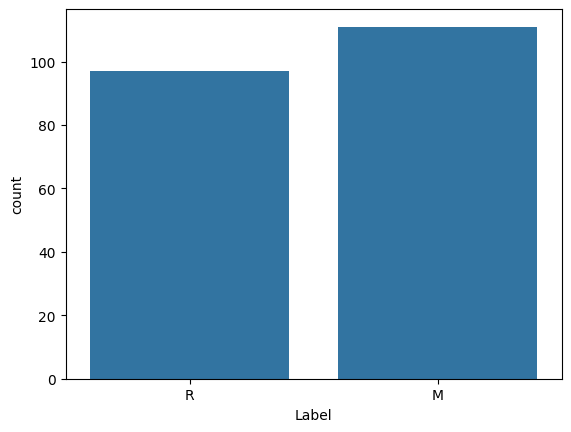

In [ ]:
sns.countplot(x=df['Label'])

### Heat map

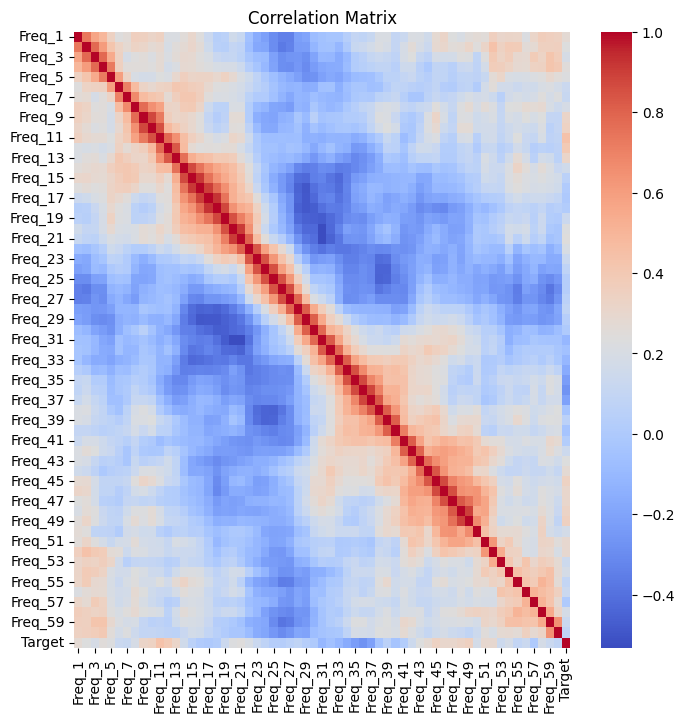

In [ ]:
df['Target'] = df['Label'].map({'R':0, 'M':1})

corr = df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**What are the top 5 correlated frequencies with the target\label?**

In [ ]:
corr['Target'].nlargest(6)

,Target
Target,1.000000
Freq_11,0.432855
Freq_12,0.392245
Freq_49,0.351312
Freq_10,0.341142
Freq_45,0.339406


# GridSearchCV setup



In [ ]:
X = df.drop(['Label', 'Target'], axis=1)
y = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

sc = StandardScaler()
knn = KNeighborsClassifier()

# Stack models with pipeline
setup = [
    ('sc', sc),
    ('knn', knn)]

pipe = Pipeline(setup)

# GridSearch setup
k_values = list(range(1,31))
param_grid = {'knn__n_neighbors':k_values}

# Train model
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

### Model Parameters

In [ ]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'sc': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Mean Test Score Result

In [ ]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
results = grid.cv_results_['mean_test_score']
results

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 , 0.66315789])

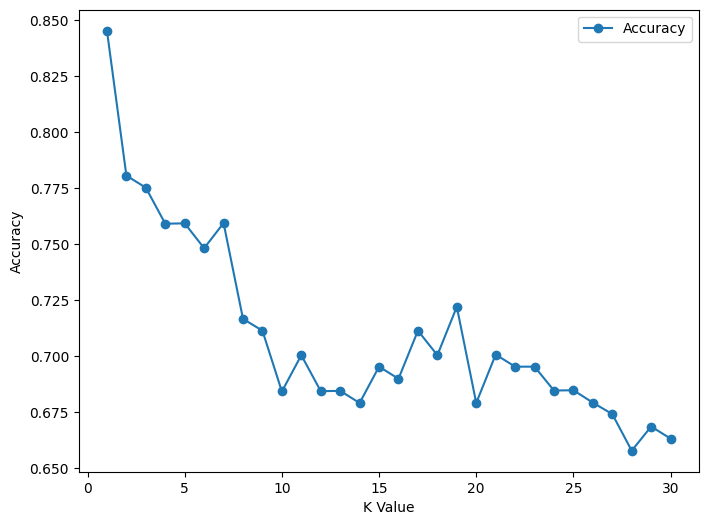

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(k_values, results, label='Accuracy', marker='o')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel("K Value")
plt.show()

In [ ]:
# from sklearn.model_selection import cross_val_score

# k_values = [i for i in range (1,31)]
# scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, y, cv=5)
#     scores.append(np.mean(score))

# sns.lineplot(x = k_values, y = scores, marker = 'o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")

### Model Evaluation



In [ ]:
y_pred = grid.predict(X_test)

#### Accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')


Accuracy: 0.905


#### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



#### Confusion Matrix

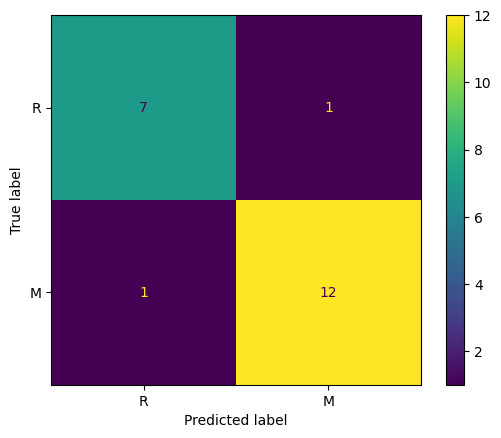

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=['R', 'M'])
plt.show()